<a href="https://colab.research.google.com/github/UCDAyoung/DataAnalysisProgramming/blob/main/%EC%B6%9C%EC%83%9D%EC%95%84_%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### #font수정 

In [ ]:
from matplotlib import font_manager
!apt install fonts-nanum
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumMyeongjo')

# 1. 통계청 출생아 수
감소하고 있는 출생아 수를 조사해 시각화를 하려고 합니다. <br>
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B81A01&conn_path=I2

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df_kosis = pd.read_csv("/content/sample_data/출생아수_시도_시_군_구__20211129173702.csv",encoding="cp949")


In [ ]:
pd.options.display.max_columns = 865
df_kosis.head()

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,1997. 04,1997. 04.1,1997. 04.2,1997. 05,1997. 05.1,1997. 05.2,1997. 06,1997. 06.1,1997. 06.2,1997. 07,1997. 07.1,1997. 07.2,1997. 08,1997. 08.1,1997. 08.2,1997. 09,1997. 09.1,1997. 09.2,1997. 10,1997. 10.1,1997. 10.2,1997. 11,1997. 11.1,1997. 11.2,1997. 12,1997. 12.1,1997. 12.2,1998. 01,1998. 01.1,1998. 01.2,1998. 02,1998. 02.1,1998. 02.2,1998. 03,1998. 03.1,1998. 03.2,1998. 04,1998. 04.1,1998. 04.2,1998. 05,1998. 05.1,1998. 05.2,1998. 06,1998. 06.1,1998. 06.2,1998. 07,1998. 07.1,1998. 07.2,1998. 08,1998. 08.1,1998. 08.2,1998. 09,1998. 09.1,1998. 09.2,1998. 10,1998. 10.1,1998. 10.2,1998. 11,1998. 11.1,1998. 11.2,1998. 12,1998. 12.1,1998. 12.2,1999. 01,1999. 01.1,1999. 01.2,1999. 02,1999. 02.1,1999. 02.2,1999. 03,1999. 03.1,1999. 03.2,1999. 04,1999. 04.1,1999. 04.2,1999. 05,1999. 05.1,1999. 05.2,1999. 06,1999. 06.1,1999. 06.2,1999. 07,1999. 07.1,1999. 07.2,1999. 08,1999. 08.1,1999. 08.2,1999. 09,1999. 09.1,1999. 09.2,1999. 10,1999. 10.1,1999. 10.2,1999. 11,1999. 11.1,1999. 11.2,1999. 12,1999. 12.1,1999. 12.2,2000. 01,2000. 01.1,2000. 01.2,2000. 02,2000. 02.1,2000. 02.2,2000. 03,2000. 03.1,2000. 03.2,2000. 04,2000. 04.1,2000. 04.2,2000. 05,2000. 05.1,2000. 05.2,2000. 06,2000. 06.1,2000. 06.2,2000. 07,2000. 07.1,2000. 07.2,2000. 08,2000. 08.1,2000. 08.2,2000. 09,2000. 09.1,2000. 09.2,2000. 10,2000. 10.1,2000. 10.2,2000. 11,2000. 11.1,2000. 11.2,2000. 12,2000. 12.1,2000. 12.2,2001. 01,2001. 01.1,2001. 01.2,2001. 02,2001. 02.1,2001. 02.2,2001. 03,2001. 03.1,2001. 03.2,2001. 04,2001. 04.1,2001. 04.2,2001. 05,2001. 05.1,2001. 05.2,2001. 06,2001. 06.1,2001. 06.2,2001. 07,2001. 07.1,2001. 07.2,2001. 08,2001. 08.1,2001. 08.2,2001. 09,2001. 09.1,2001. 09.2,2001. 10,2001. 10.1,2001. 10.2,2001. 11,2001. 11.1,2001. 11.2,2001. 12,2001. 12.1,2001. 12.2,2002. 01,2002. 01.1,2002. 01.2,2002. 02,2002. 02.1,2002. 02.2,2002. 03,2002. 03.1,2002. 03.2,2002. 04,2002. 04.1,2002. 04.2,2002. 05,2002. 05.1,2002. 05.2,2002. 06,2002. 06.1,2002. 06.2,2002. 07,2002. 07.1,2002. 07.2,2002. 08,2002. 08.1,2002. 08.2,2002. 09,2002. 09.1,2002. 09.2,2002. 10,2002. 10.1,2002. 10.2,2002. 11,2002. 11.1,2002. 11.2,2002. 12,2002. 12.1,2002. 12.2,2003. 01,2003. 01.1,2003. 01.2,2003. 02,2003. 02.1,2003. 02.2,2003. 03,2003. 03.1,2003. 03.2,2003. 04,2003. 04.1,2003. 04.2,2003. 05,2003. 05.1,2003. 05.2,2003. 06,2003. 06.1,2003. 06.2,2003. 07,2003. 07.1,2003. 07.2,2003. 08,2003. 08.1,2003. 08.2,2003. 09,2003. 09.1,2003. 09.2,2003. 10,2003. 10.1,2003. 10.2,2003. 11,2003. 11.1,2003. 11.2,2003. 12,2003. 12.1,2003. 12.2,2004. 01,2004. 01.1,2004. 01.2,2004. 02,2004. 02.1,2004. 02.2,2004. 03,2004. 03.1,2004. 03.2,2004. 04,2004. 04.1,2004. 04.2,2004. 05,2004. 05.1,2004. 05.2,2004. 06,2004. 06.1,2004. 06.2,2004. 07,2004. 07.1,2004. 07.2,2004. 08,2004. 08.1,2004. 08.2,2004. 09,2004. 09.1,2004. 09.2,2004. 10,2004. 10.1,2004. 10.2,2004. 11,2004. 11.1,2004. 11.2,2004. 12,2004. 12.1,2004. 12.2,2005. 01,2005. 01.1,2005. 01.2,2005. 02,2005. 02.1,2005. 02.2,2005. 03,2005. 03.1,2005. 03.2,2005. 04,2005. 04.1,2005. 04.2,2005. 05,2005. 05.1,2005. 05.2,2005. 06,2005. 06.1,2005. 06.2,2005. 07,2005. 07.1,2005. 07.2,2005. 08,2005. 08.1,2005. 08.2,2005. 09,2005. 09.1,2005. 09.2,2005. 10,2005. 10.1,2005. 10.2,2005. 11,2005. 11.1,2005. 11.2,2005. 12,2005. 12.1,2005. 12.2,2006. 01,2006. 01.1,2006. 01.2,2006. 02,2006. 02.1,2006. 02.2,2006. 03,2006. 03.1,2006. 03.2,2006. 04,2006. 04.1,2006. 04.2,2006. 05,2006. 05.1,2006. 05.2,2006. 06,2006. 06.1,2006. 06.2,2006. 07,2006. 07.1,2006. 07.2,2006. 08,2006. 08.1,2006. 08.2,2006. 09,2006. 09.1,2006. 09.2,2006. 10,2006. 10.1,2006. 10.2,2006. 11,2006. 11.1,2006. 11.2,2006. 12,2006. 12.1,2006. 12.2,2007. 01,2007. 01.1,2007. 01.2,2007. 02,2007. 02.1,2007. 02.2,2007. 03,2007. 03.1,2007. 03.2,2007. 04,2007. 04.1,2007. 04.2,2007. 05,2007. 05.1,2007. 05.2,2007. 06,2007. 06.1,2007. 06.2,2007. 07,2007. 07.1,2007. 07.2,2007. 08,2007. 08.1,2007. 08.2,2007. 09,2007. 09.1,2007. 

In [ ]:
df = df_kosis.melt(id_vars='시군구별')
df.head()

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345


In [ ]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
#시군구별이라는 행을 제거 
print(df.shape)
df = df[df['시군구별'] != '시군구별'].copy()  #제거 후 df 다시 갱신
df.shape

(16416, 3)


(15552, 3)

In [ ]:
df.head()

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646


In [ ]:
df['variable'].str.split(".")
df["variable"].str.split(".",expand = True) #dataFrame형태로 생성

,0,1,2
1,1997,01,None
2,1997,01,None
3,1997,01,None
4,1997,01,None
5,1997,01,None
...,...,...,...
16411,2020,12,2
16412,2020,12,2
16413,2020,12,2
16414,2020,12,2


In [ ]:
df['연도'] = df['variable'].str.split(".",expand = True)[0] # 0컬럼 에 있는 값들을 '연도'라는 컬럼에 추가하기 
df.head()

,시군구별,variable,value,연도
1,전국,1997. 01,63268,1997
2,서울특별시,1997. 01,13205,1997
3,부산광역시,1997. 01,4201,1997
4,대구광역시,1997. 01,3345,1997
5,인천광역시,1997. 01,3646,1997


In [ ]:
df['월'] = df['variable'].str.split(".",expand = True)[1] # 1컬럼 에 있는 값들을 -> '월' 
df['성별'] = df['variable'].str.split(".",expand = True)[2] #2컬럼 에 있는 값들을  -> '성별' 
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None


In [ ]:
df['성별'].unique() #unique한 값 확인하기 & dtype = object -> 문자인점 주의 

array([None, '1', '2'], dtype=object)

In [ ]:
df['성별'] = df['성별'].fillna("전체") #None 값을 -> "전체" 로 채우기 
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [ ]:
df['성별'] = df['성별'].replace('1','남자').replace('2','여자')

In [ ]:
df['성별'].unique()

array(['전체', '남자', '여자'], dtype=object)

In [ ]:
df['성별'].value_counts() #value_counts 는 단 Series데이터만 가능  *SERIES : 1개 

남자    5184
여자    5184
전체    5184
Name: 성별, dtype: int64

In [ ]:
df = df.rename(columns={'variable':'기간','value':'출생아 수'}) # 컬럼 이름 재변경
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15552 entries, 1 to 16415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    15552 non-null  object
 1   기간      15552 non-null  object
 2   출생아 수   15552 non-null  object
 3   연도      15552 non-null  object
 4   월       15552 non-null  object
 5   성별      15552 non-null  object
dtypes: object(6)
memory usage: 850.5+ KB


In [ ]:
df['출생아 수'] = df['출생아 수'].replace("-",np.nan) #출생아 수 데이터 내부에 - 라는 값이 존재함 -> 결측치로 변경 

In [ ]:
df['출생아 수'] = df['출생아 수'].astype(float) #np.nan 결측치로 인해 int로 바꾸려고 했는데 실패 -> np.nan의 타입은 float이라서 float으로 변경 

In [ ]:
df['출생아 수'].describe()

count    15012.000000
mean      3012.725286
std       6587.701782
min         30.000000
25%        621.000000
50%       1025.000000
75%       1908.250000
max      63268.000000
Name: 출생아 수, dtype: float64

In [ ]:
df

,시군구별,기간,출생아 수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
...,...,...,...,...,...,...
16411,전라북도,2020. 12.2,326.0,2020,12,여자
16412,전라남도,2020. 12.2,351.0,2020,12,여자
16413,경상북도,2020. 12.2,431.0,2020,12,여자
16414,경상남도,2020. 12.2,539.0,2020,12,여자


In [ ]:
df_all = df[(df['시군구별']=='전국') & (df['성별']=='전체')] # 전국 남여 총 출생아 수 
df_all.head(2)

,시군구별,기간,출생아 수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체


In [ ]:
df_all = df_all[['연도','월','출생아 수']].copy()
df_all.head()

,연도,월,출생아 수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0


## 여기까지 전처리 과정 진행하였습니다. 아래는 시각화 과정입니다.

In [ ]:
#인덱싱 하기
df_all.set_index(['연도','월'])

출생아 수
연도   월           
1997  01  63268.0
      02  58144.0
      03  62160.0
      04  56949.0
      05  55270.0
...           ...
2020  08  22402.0
      09  23499.0
      10  21884.0
      11  20054.0
      12  19641.0

[288 rows x 1 columns]

In [ ]:

plt.rc('font', family='Malgun Gothic')



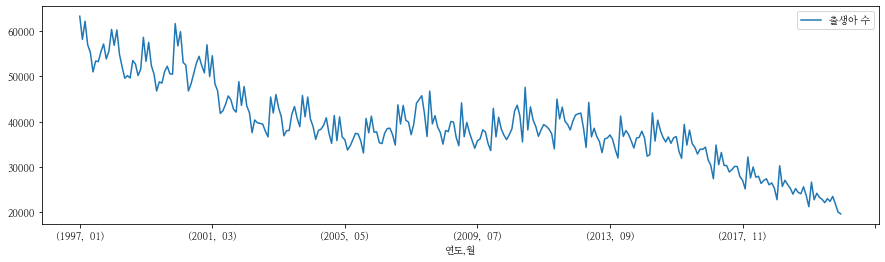

In [ ]:
df_all.set_index(['연도','월']).plot(figsize=(15,4))

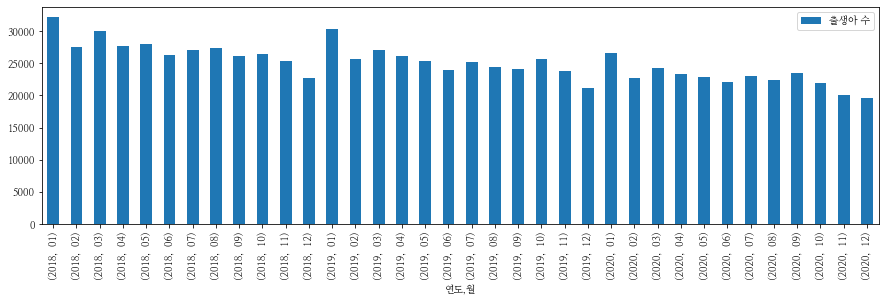

In [ ]:
df_all[-36:].set_index(['연도','월']).plot.bar(figsize=(15,4))

In [ ]:
import seaborn as sns

In [ ]:
df_all

,연도,월,출생아 수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0
...,...,...,...
16132,2020,08,22402.0
16189,2020,09,23499.0
16246,2020,10,21884.0
16303,2020,11,20054.0


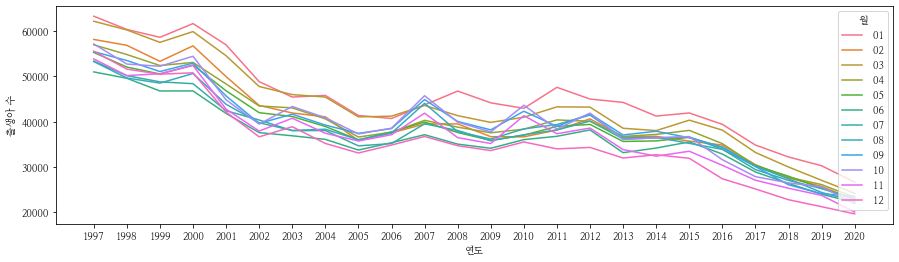

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all,x='연도',y='출생아 수',hue='월').figsize=(15,4)

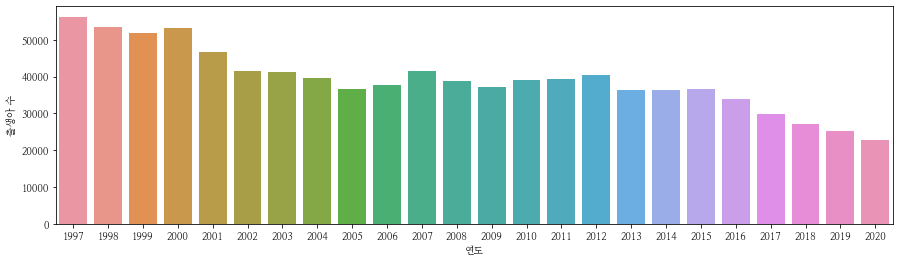

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all,x="연도",y="출생아 수",ci=None).figsize=(15,4)

In [ ]:
df_local = df[df['시군구별']!='전국'].copy()
df_local

,시군구별,기간,출생아 수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체
...,...,...,...,...,...,...
16411,전라북도,2020. 12.2,326.0,2020,12,여자
16412,전라남도,2020. 12.2,351.0,2020,12,여자
16413,경상북도,2020. 12.2,431.0,2020,12,여자
16414,경상남도,2020. 12.2,539.0,2020,12,여자


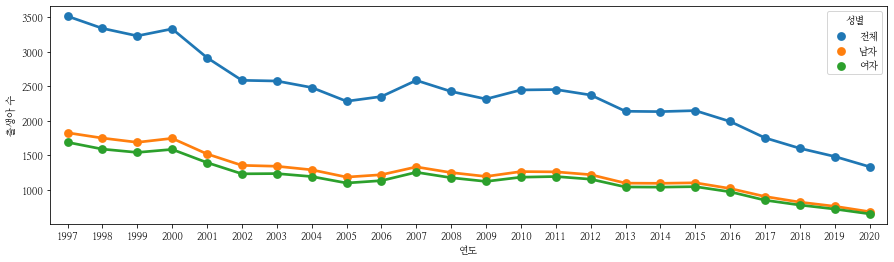

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local,x="연도",y="출생아 수",hue="성별",ci=None)

In [ ]:
df_local_all = df_local[df_local['성별']=='전체']
df_local_all.head()

,시군구별,기간,출생아 수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체


## 시군구별마다 연도에 따른 출생아 수 

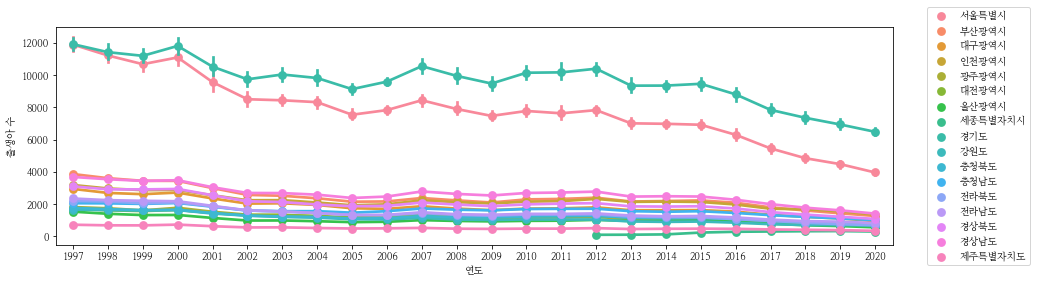

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_all,x="연도",y="출생아 수",hue="시군구별")
plt.legend(loc='center right',bbox_to_anchor=(1.17,0.5),ncol=1)

## 서울 시와 경기도 출생아 수 비교

In [ ]:
df_local_2 = df_local_all[df_local_all['시군구별'].isin(['서울특별시','경기도'])]

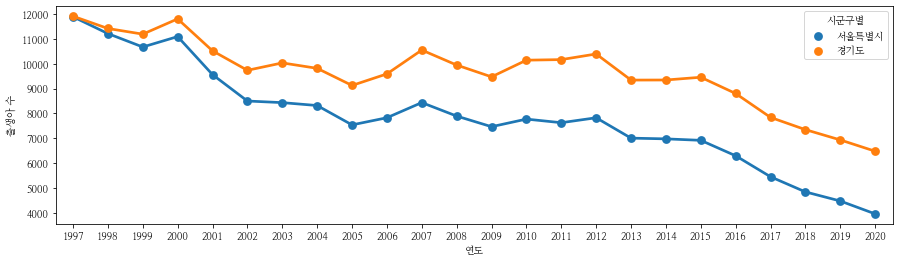

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_2,x="연도",y="출생아 수",ci=None,hue="시군구별")


## 세종특별시 출생아 수

In [ ]:
df_local_세종 = df_local_all[df_local_all['시군구별'] =='세종특별자치시']

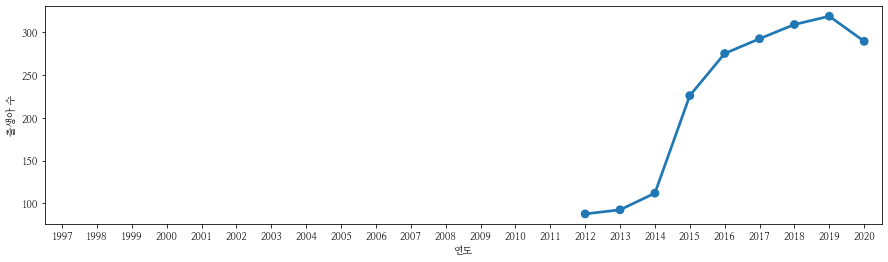

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_세종,x="연도",y="출생아 수",ci=None)

## 2020년까지 계속해서 감소하는 출생아 수를 조사해 우리나라의 출생률 문제를 시각화해보았습니다.